#第10章 分類

この章では、分類モデルについて解説する。機械学習における分類問題とは、データを事前に定めたクラス（カテゴリ）に分類するタスクである。
例えば、メールを「スパム」または「非スパム」に分類する、画像から「猫」「犬」「鳥」を識別するなどが分類問題に該当する。
分類モデルは、入力データ（特徴）を基に正しいクラスを予測するように訓練される。その性能評価には、正解率（Accuracy）、再現率（Recall）、適合率（Precision）、および F1スコア（RecallとPrecisionの調和平均）が用いられ、これらの指標がモデルの優劣を決める基準となる。


##10.1 ロジスティック回帰による分類


####ロジスティック関数を表示するプログラム

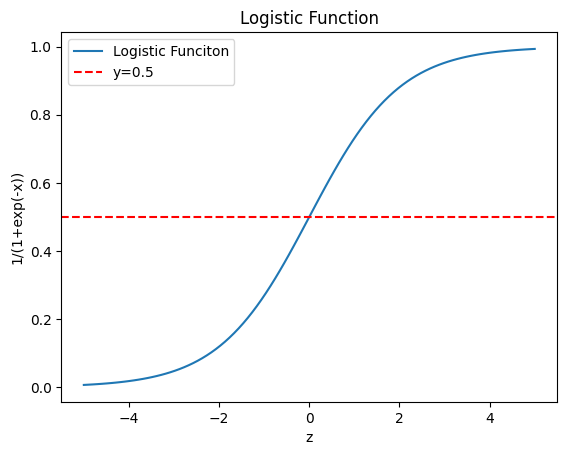

In [2]:
#ロジスティクス関数
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

x = np.linspace(-5,5,100)
y = 1/(1+np.exp(-x))

plt.title("Logistic Function")
plt.xlabel("z")
plt.ylabel("1/(1+exp(-x))")
plt.plot(x,y,label="Logistic Funciton")
plt.axhline(y=0.5, color="red", linestyle="--", label="y=0.5")
plt.legend()
plt.show()
plt.close()

##10.2 例題：乳がんデータセットから予測

クラスデータの先頭10件を表示
実データ[0 1 1 0 1 0 1 1 1 1]
予測結果[0 1 1 0 1 0 1 1 1 1]
先頭10件を予測したときの確率
[[0.532 0.468]
 [0.006 0.994]
 [0.002 0.998]
 [0.883 0.117]
 [0.001 0.999]
 [0.989 0.011]
 [0.018 0.982]
 [0.001 0.999]
 [0.004 0.996]
 [0.138 0.862]]
Accuracy: Train0.987  Test0.988
Confusion matrix
[[ 54   1]
 [  1 115]]
Classification report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99       116

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



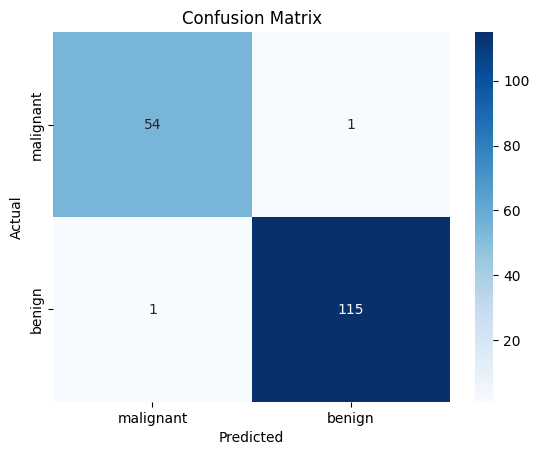

In [3]:
import numpy as np
import pandas as pd

# 手順1　データの読み込み
from sklearn.datasets import load_breast_cancer
# 乳がんデータセットの読み込み
df = load_breast_cancer()
X = df.data
y = df.target

#手順2　データの前処理
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
# 特徴量の標準化
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

#手順3　モデルの指定
# ロジスティック回帰モデルの学習
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)

#手順4　モデルの訓練
model.fit(X_train_sc, y_train)

#手順5 モデルの予測
y_train_pred = model.predict(X_train_sc)
y_test_pred = model.predict(X_test_sc)
#予測結果の先頭10件を表示
print("クラスデータの先頭10件を表示")
print(f"実データ{y_test[:10]}")
print(f"予測結果{y_test_pred[:10]}")
#予測したときの確率を先頭10件を表示する
prob = np.round(model.predict_proba(X_test_sc[:10]),3)
print(f"先頭10件を予測したときの確率\n{prob}")

#手順6 モデル評価
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#訓練データと評価データの正解率(Accurary)を計算する
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)
#混同行列を計算する
cm_test = confusion_matrix(y_test, y_test_pred)
#分類結果のレポートを表示する
repo_test = classification_report(y_test, y_test_pred)

print(f"Accuracy: Train{acc_train:.3f}  Test{acc_test:.3f}")
print(f"Confusion matrix\n{cm_test}")
print(f"Classification report\n{repo_test}")

# 混同行列の可視化
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=df.target_names, yticklabels=df.target_names)
#plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
plt.close()

##10.3 サポートベクタマシン分類

###10.3.2 線形サポートベクタマシンによる乳がんデータ分類問題

C=0.01 Accuracy: Train=0.982 Test=0.994

Confusion Matrix:
[[ 54   1]
 [  0 116]]

Classification Report:              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.99      1.00      1.00       116

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



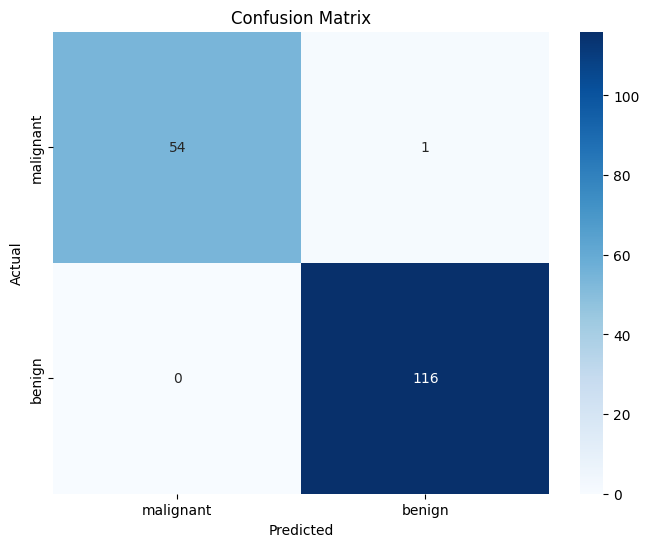

In [4]:
import numpy as np
import pandas as pd


#手順1 データセットの読み込み
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

#手順2　前処理
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# データの分割（訓練データとテストデータ）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
# 特徴量の標準化
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

#手順3 LinearSVCモデルの作成
from sklearn.svm import LinearSVC
c=0.01
model = LinearSVC(C=0.01, max_iter=100000)
#model = LinearSVC(C=0.1, max_iter=100000)
#model = LinearSVC(C=1.0, max_iter=100000)
#model = LinearSVC(C=10.0, max_iter=100000)

#手順4　モデルの訓練
model.fit(X_train_sc, y_train)

#手順5 モデルで予測
y_train_pred = model.predict(X_train_sc)
y_test_pred = model.predict(X_test_sc)

#手順6 モデルの評価
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

# 結果の表示
print(f"C={c} Accuracy: Train={accuracy_train:.3f} Test={accuracy_test:.3f}")
print(f"\nConfusion Matrix:\n{conf_matrix}")
print(f"\nClassification Report:{report}")

# 混同行列の可視化
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
plt.close()

###10.3.3　非線形サポートベクタマシンによる分類

正則化係数Cを[0.01, 0.1, 1.0, 10.0]に変化させたモデルの比較

In [5]:
import numpy as np
import pandas as pd


#手順1 データセットの読み込み
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

#手順2　前処理
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# データの分割（訓練データとテストデータ）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
# 特徴量の標準化
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

#手順3 非線形SVCモデル(kernel="rbf")の作成
from sklearn.svm import SVC
for c in [0.01, 0.1, 1.0, 10.0]:
    model = SVC(kernel="rbf", C=c,max_iter=100000)

    #手順4　モデルの訓練
    model.fit(X_train_sc, y_train)

    #手順5 モデルで予測
    y_train_pred = model.predict(X_train_sc)
    y_test_pred = model.predict(X_test_sc)

    #手順6 モデルの評価
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    report = classification_report(y_test, y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # 結果の表示
    print(f"C={c} Accuracy: Train={accuracy_train:.3f} Test={accuracy_test:.3f}")
    print(f"\nConfusion Matrix:\n{conf_matrix}")
    print(f"\nClassification Report:{report}")

    # 混同行列の可視化
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    #plt.show()
    plt.close()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C=0.01 Accuracy: Train=0.606 Test=0.678

Confusion Matrix:
[[  0  55]
 [  0 116]]

Classification Report:              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.68      1.00      0.81       116

    accuracy                           0.68       171
   macro avg       0.34      0.50      0.40       171
weighted avg       0.46      0.68      0.55       171

C=0.1 Accuracy: Train=0.940 Test=0.942

Confusion Matrix:
[[ 52   3]
 [  7 109]]

Classification Report:              precision    recall  f1-score   support

           0       0.88      0.95      0.91        55
           1       0.97      0.94      0.96       116

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171

C=1.0 Accuracy: Train=0.985 Test=0.977

Confusion Matrix:
[[ 52   3]
 [  1 115]]

Classification Report:              precision    recall

##10.4 決定木とランダムフォレストによる分類

###10.4.2 決定木分類による乳がんデータ分類

Accuracy: Train1.000 Test0.930

Confusion Matrix:
[[ 55   4]
 [  8 104]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.87      0.93      0.90        59
      benign       0.96      0.93      0.95       112

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.92       171
weighted avg       0.93      0.93      0.93       171



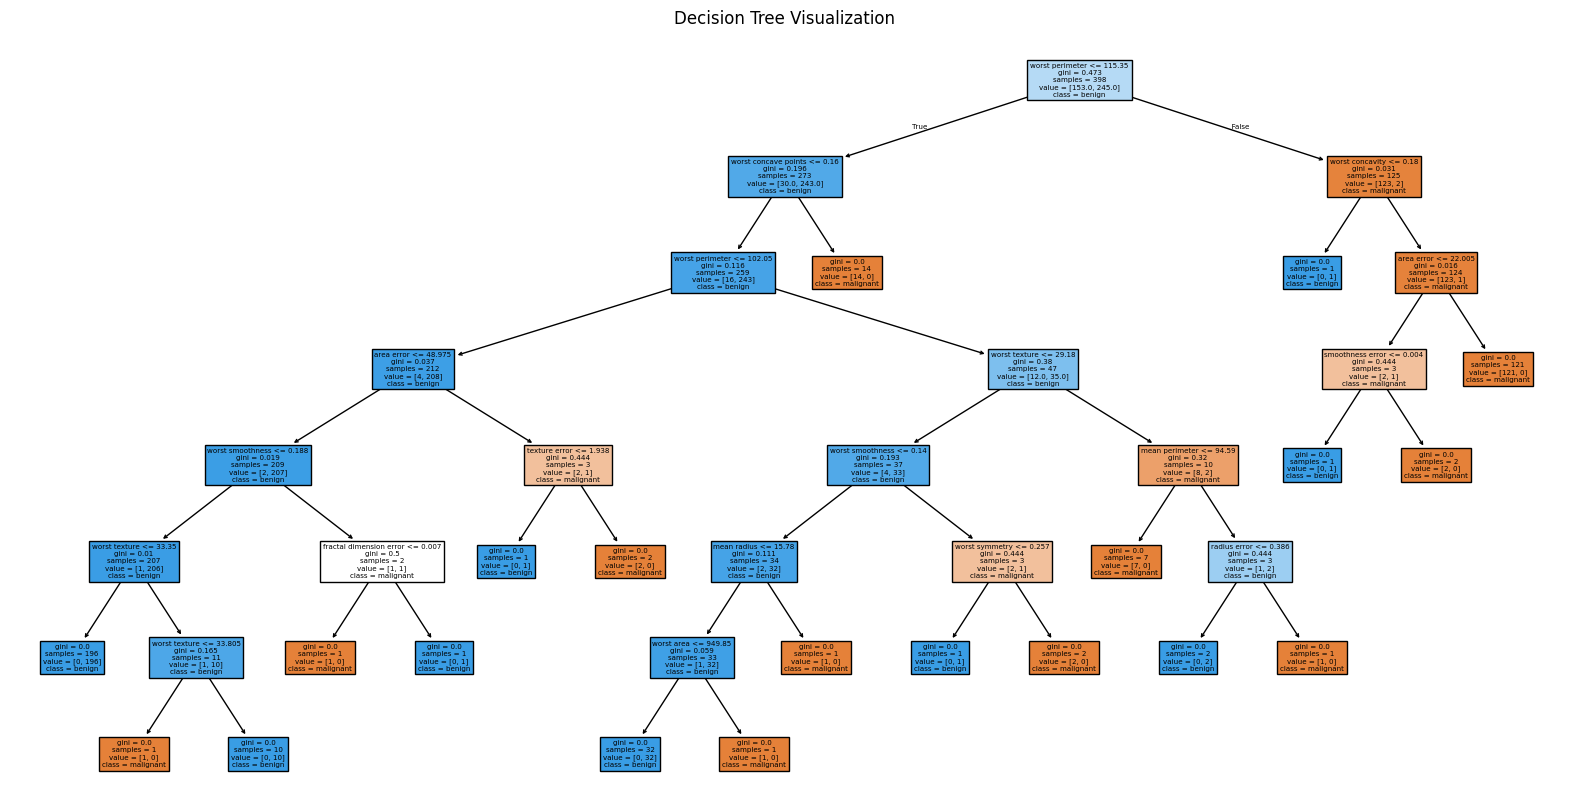


Feature Importances:
                    Feature  Importance
22          worst perimeter    0.718417
27     worst concave points    0.124138
21            worst texture    0.050580
13               area error    0.017012
24         worst smoothness    0.015971
26          worst concavity    0.010363
23               worst area    0.010296
2            mean perimeter    0.009910
0               mean radius    0.009690
10             radius error    0.007078
11            texture error    0.007078
28           worst symmetry    0.007078
14         smoothness error    0.007078
19  fractal dimension error    0.005309
18           symmetry error    0.000000
25        worst compactness    0.000000
20             worst radius    0.000000
15        compactness error    0.000000
17     concave points error    0.000000
16          concavity error    0.000000
1              mean texture    0.000000
12          perimeter error    0.000000
9    mean fractal dimension    0.000000
8             mean

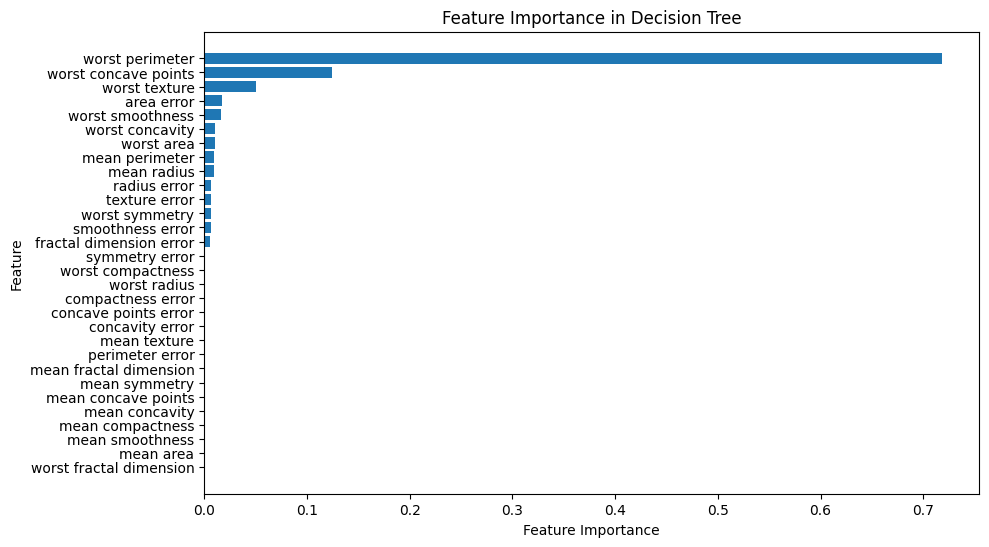

In [6]:
import numpy as np
import pandas as pd
# 必要なライブラリのインポート

#手順1 データの読み込み
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

#手順2 データの分割 (70% 訓練用, 30% 評価用)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

#手順3 決定木モデルの作成
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="gini",  random_state=10)
#次の行は、max_depth=5を指定しする場合
#model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=10)

#手順4 モデルの学習
model.fit(X_train, y_train)

#手順5 テストデータでの予測
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#手順6 モデル評価
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred, target_names=data.target_names)

print(f"Accuracy: Train{accuracy_train:.3f} Test{accuracy_test:.3f}")
print(f"\nConfusion Matrix:\n{cm_test}" )
print(f"\nClassification Report:\n{report}")

# 決定木の可視化
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# 特徴量の重要度を取得
feature_importances = model.feature_importances_
feature_names = data.feature_names

# データフレームに変換して表示
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importances:")
print(importance_df)

# 特徴量の重要度を可視化
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], align="center")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Decision Tree")
plt.gca().invert_yaxis()  # 重要度が高い順に上から表示
plt.show()
plt.close()

###10.4.3 ランダムフォレスト分類による乳がんデータ分類問題

Accuracy: Train0.997 Test0.953

Confusion Matrix:
[[ 53   2]
 [  6 110]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.90      0.96      0.93        55
      benign       0.98      0.95      0.96       116

    accuracy                           0.95       171
   macro avg       0.94      0.96      0.95       171
weighted avg       0.96      0.95      0.95       171


Feature Importances:
                    Feature  Importance
23               worst area    0.139387
27     worst concave points    0.137729
20             worst radius    0.129699
22          worst perimeter    0.101730
7       mean concave points    0.077448
0               mean radius    0.067571
13               area error    0.044217
2            mean perimeter    0.040337
6            mean concavity    0.036071
26          worst concavity    0.029705
12          perimeter error    0.028416
3                 mean area    0.026637
1              mean texture    0.0

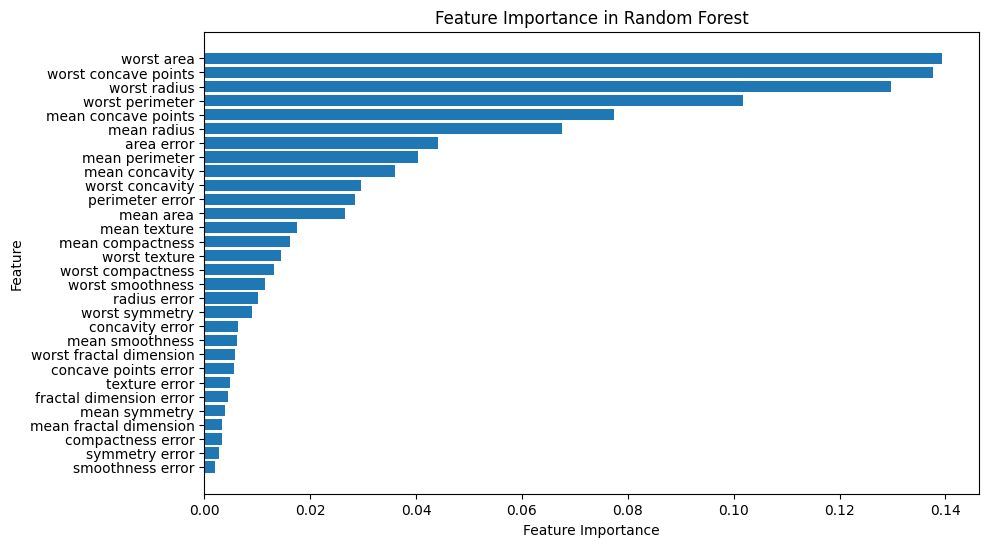

In [7]:
import numpy as np
import pandas as pd

# 必要なライブラリのインポート
import matplotlib.pyplot as plt
import pandas as pd

#手順1 データの読み込み
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

#手順2 データの分割 (70% 訓練用, 30% 評価用)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

#手順3 ランダムフォレストモデルの作成
from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier(n_estimators=100, random_state=10)
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=10)

#手順4 モデルの訓練
model.fit(X_train, y_train)

#手順5 データの予測
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#手順6 モデル評価
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred, target_names=data.target_names)

print(f"Accuracy: Train{accuracy_train:.3f} Test{accuracy_test:.3f}")
print(f"\nConfusion Matrix:\n{cm_test}" )
print(f"\nClassification Report:\n{report}")

# 特徴量の重要度を取得
feature_importances = model.feature_importances_
feature_names = data.feature_names

# データフレームに変換して表示
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importances:")
print(importance_df)

# 特徴量の重要度を可視化
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], align="center")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()  # 重要度が高い順に上から表示
plt.show()


##10.5 XGBoost分類とOptunaによるモデルチューニング

##10.5.2 例題 XGBoostで乳がんデータ分類問題を予測

評価データの値： [0 1 1 0 1 0 1 1 1 1]
その予測結果　： [0 1 1 0 1 0 1 1 1 1]
予測した確率 　: [0.3062152  0.9943975  0.9938309  0.0192394  0.99691534 0.09674194
 0.99931264 0.9993042  0.9878719  0.641869  ]
Accuracy: Train1.000 Test0.947

Confusion Matrix:
[[35  1]
 [ 5 73]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        36
           1       0.99      0.94      0.96        78

    accuracy                           0.95       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



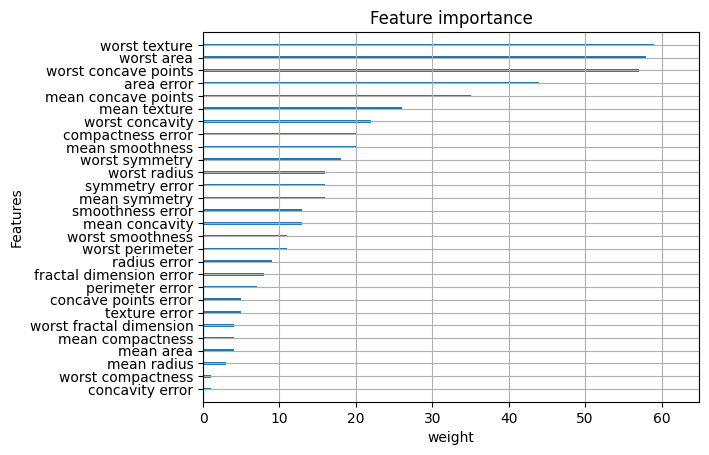

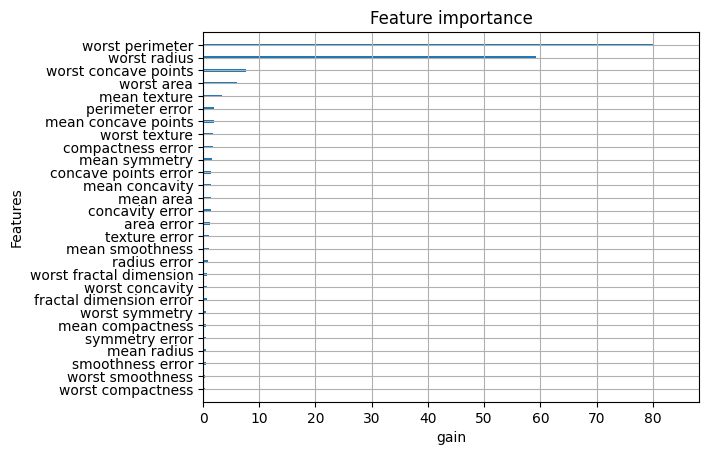

In [8]:
import numpy as np
import pandas as pd

#手順1 乳がんデータセットの読み込み
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()
X = df.data
y = df.target

#手順2 前処理
# データを訓練データと評価データに分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
#xgboostモジュールのインポート
import xgboost as xgb
# XGBoost用のデータ形式に変換
fn = list(df.feature_names)
X_train_xgb = xgb.DMatrix(X_train, label=y_train, feature_names=fn)
X_test_xgb = xgb.DMatrix(X_test, label=y_test, feature_names=fn)

#手順3　モデルのパラーメータ設定
# ハイパーパラメータの設定
params = {
    "objective": "binary:logistic",  # 二値分類
    "eval_metric": "logloss",       # 損失関数
    "max_depth": 5,                 # ツリーの深さ
    "learning_rate": 0.1,           # 学習率
    "seed": 10                      # 再現性のための乱数シード
}

#手順4 モデルの訓練
model = xgb.train(
    params,     #モデルのパラメータを設定
    X_train_xgb,     #訓練に使うデータ
    num_boost_round=100 #ブースティング繰り返し回数
)

#手順5 予測
# 確率で予測
y_train_pred_proba = model.predict(X_train_xgb)
y_test_pred_proba = model.predict(X_test_xgb)
# しきい値0.5でクラスを予測
y_train_pred = (y_train_pred_proba > 0.5).astype(int)
y_test_pred = (y_test_pred_proba > 0.5).astype(int)
#実際のデータと予測データの比較
print("評価データの値：", y_test[:10])
print("その予測結果　：", y_test_pred[:10])
print("予測した確率 　:", y_test_pred_proba[:10])

#手順6 モデル評価
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
report=classification_report(y_test, y_test_pred)
print(f"Accuracy: Train{accuracy_train:.3f} Test{accuracy_test:.3f}")
print(f"\nConfusion Matrix:\n{cm_test}" )
print(f"\nClassification Report:\n{report}")

# 特徴重要度の可視化
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type="weight", xlabel="weight", show_values=False)
xgb.plot_importance(model, importance_type="gain", xlabel="gain", show_values=False)
plt.show()
plt.close()

###10.5.3 Optunaモジュールでハイパーパラメータのチューニング

In [9]:
#optunaモジュールを使うために、ライブラリーをインストールする
#1度だけ、このセルを実行する
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.2 MB/s eta 0:00:00


In [10]:
import numpy as np
import pandas as pd

# 乱数シードの固定
SEED = 10
np.random.seed(SEED)

#手順1 データの準備
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()
X = df.data
y = df.target

#手順2 前処理
# データを訓練データと評価データに分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# DMatrixの作成
import xgboost as xgb
X_train_xgb = xgb.DMatrix(X_train, label=y_train)
X_test_xgb = xgb.DMatrix(X_test, label=y_test)

# Optunaの目的関数
import optuna
def objective(trial):
    #手順3 ハイパーパラメータの探索範囲
    params = {
        "objective": "binary:logistic",  # 二値分類
        "eval_metric": trial.suggest_categorical("eval_metric",["logloss","auc"]),  # 損失関数
        "max_depth": trial.suggest_int("max_depth", 3, 12),  #ツリーの最大深度
        "eta": trial.suggest_float("eta", 0.01, 0.3),  # 学習率
        "subsample": trial.suggest_float("subsample", 0.5, 1.0), #訓練に使うデータの割合
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0), #ツリーの構成に使用する特徴量の割合
        "lambda": trial.suggest_float("lambda", 1e-3, 10.0, log=True),  # L2正則化
        "alpha": trial.suggest_float("alpha", 1e-3, 10.0, log=True),    # L1正則化
        "seed":SEED  #評価用に乱数の種を固定する
    }

    #手順4 モデルの訓練
    model = xgb.train(
        params,   #ハイパーパラメータの候補
        X_train_xgb, #訓練データ
        num_boost_round=300, #ブースティング繰り返し回数
        evals=[(X_test_xgb, "test")], #検証用のデータセット
        early_stopping_rounds=10, #最適化の改善が表れない判断回数
        verbose_eval=False #学習中に評価結果を表示する頻度を抑制する
    )

    #手順5 検証データでの予測
    y_pred = model.predict(X_test_xgb)
    y_pred_class = (y_pred > 0.5).astype(int)
    #手順6 モデルの評価
    accuracy = accuracy_score(y_test, y_pred_class)

    # Optunaは最小化を目指すため、-accuracyを返す
    return accuracy

# Optunaによる最適化
# 精度を最大化したいので負値を返す設定
study = optuna.create_study(direction="maximize")
#最大100回繰り返す
study.optimize(objective, n_trials=100)

# 最適なハイパーパラメータの取得
print(f"Best trial:Value: {study.best_value:.4f}")
print("Best Params: ")
for key, value in study.best_params.items():
    print(f"    {key}: {value}")
# 探索履歴のプロット
optuna.visualization.plot_optimization_history(study).show()
# ハイパーパラメータの重要度プロット
optuna.visualization.plot_param_importances(study).show()

#ベストモデルでモデルを再構築し結果を表示する
# ベストパラメータを取得
best_params = study.best_params

# ベストモデルの再構築
best_model = xgb.train(
    { **best_params,
     "objective": "binary:logistic",
     "seed": SEED
    },
    X_train_xgb, #訓練データ
    num_boost_round=300, #ブースティング繰り返し回数
    evals=[(X_test_xgb, "test")], #検証用のデータセット
    early_stopping_rounds=10, #最適化の改善が表れない判断回数
    verbose_eval=False #学習中に評価結果を表示する頻度を抑制する
)

# 検証データで予測
y_train_pred = best_model.predict(X_train_xgb)
y_test_pred = best_model.predict(X_test_xgb)
y_train_pred_class = (y_train_pred > 0.5).astype(int)
y_test_pred_class = (y_test_pred > 0.5).astype(int)

# モデル評価
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

accuracy_train = accuracy_score(y_train, y_train_pred_class)
accuracy_test = accuracy_score(y_test, y_test_pred_class)
cm_test = confusion_matrix(y_test, y_test_pred_class)
report = classification_report(y_test, y_test_pred_class)
print(f"Best Model Accuracy: Train{accuracy_train:.4f} Test{accuracy_test:.4f}")
print(f"\nConfusion Matrix:\n{cm_test}")
print(f"\nClassification Report:\n{report}")
print(f"\nBest_Params:\n{best_params}")


[I 2025-02-24 23:20:09,018] A new study created in memory with name: no-name-04ab4881-5a38-4aab-a198-37c58a83b59c
[I 2025-02-24 23:20:13,655] Trial 0 finished with value: 0.9824561403508771 and parameters: {'eval_metric': 'auc', 'max_depth': 10, 'eta': 0.04678803767035393, 'subsample': 0.7192631038906302, 'colsample_bytree': 0.8438760739269878, 'lambda': 0.10204509286941163, 'alpha': 0.16570646114552734}. Best is trial 0 with value: 0.9824561403508771.
[I 2025-02-24 23:20:14,987] Trial 1 finished with value: 0.9736842105263158 and parameters: {'eval_metric': 'auc', 'max_depth': 4, 'eta': 0.20245498147825935, 'subsample': 0.5105393267035003, 'colsample_bytree': 0.8488922249563076, 'lambda': 0.1939456246320726, 'alpha': 0.3151044566433235}. Best is trial 0 with value: 0.9824561403508771.
[I 2025-02-24 23:20:15,116] Trial 2 finished with value: 0.9736842105263158 and parameters: {'eval_metric': 'auc', 'max_depth': 4, 'eta': 0.22500023097384775, 'subsample': 0.9049886989060894, 'colsample_

Best trial:Value: 0.9825
Best Params: 
    eval_metric: auc
    max_depth: 10
    eta: 0.04678803767035393
    subsample: 0.7192631038906302
    colsample_bytree: 0.8438760739269878
    lambda: 0.10204509286941163
    alpha: 0.16570646114552734


Best Model Accuracy: Train0.9912 Test0.9825

Confusion Matrix:
[[39  0]
 [ 2 73]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       1.00      0.97      0.99        75

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114


Best_Params:
{'eval_metric': 'auc', 'max_depth': 10, 'eta': 0.04678803767035393, 'subsample': 0.7192631038906302, 'colsample_bytree': 0.8438760739269878, 'lambda': 0.10204509286941163, 'alpha': 0.16570646114552734}


##10.6 LightGBM分類

###10.6.1 例題：LightGBMで乳がんデータ分類問題

In [11]:
#LightGBMでメモリ効率よくデータ処理するための次のモジュールをインストールする
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 5.9 MB/s eta 0:00:00


In [12]:
import numpy as np
import pandas as pd

#手順1 乳がんデータセットの読み込み
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()
X = df.data
y = df.target

#手順2 前処理
# データを訓練データと評価データに分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
# LightGBMデータセットの作成
import lightgbm as lgb
X_train_lg = lgb.Dataset(X_train, label=y_train)
X_test_lg = lgb.Dataset(X_test, label=y_test, reference=X_train_lg)

#手順3　モデルの設定
#ハイパーパラメータの設定
params = {
    "objective": "binary",  #目的関数は二値分類
    "metric": "binary_logloss",  #評価指標はロジスティクス損失
    "num_leaves": 31,  #決定木の最大葉の数
    "learning_rate": 0.05,  #学習率
    "feature_fraction": 0.9,  #学習に使う特徴量(列)の割合
    "min_data_in_leaf": 5,          # 葉の最小データ数
    "min_gain_to_split": 0.0,      # スプリットするための最小利得
    "max_bin": 512,                 # ヒストグラムのビン数
    "seed":10,
    "verbose":-1
}

#手順4 モデルの学習
model = lgb.train(
    params,    #ハイパーパラメータ
    X_train_lg,  #訓練データ指定
    num_boost_round=500, #作成する決定木の数
    valid_sets=[X_test_lg],  #検証用のデータ
    valid_names=["test"]
)

#手順5 データの予測
y_train_pred=model.predict(X_train, num_iteration=model.best_iteration)
y_test_pred=model.predict(X_test,num_iteration=model.best_iteration)
y_train_pred_class = (y_train_pred >= 0.5).astype(int)
y_test_pred_class = (y_test_pred >= 0.5).astype(int)

#手順6 精度評価
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_train = accuracy_score(y_train, y_train_pred_class)
accuracy_test = accuracy_score(y_test, y_test_pred_class)
cm_test = confusion_matrix(y_test, y_test_pred_class)
report = classification_report(y_test, y_test_pred_class)
print(f"Accuracy: Train{accuracy_train:.3f} Test{accuracy_test:.3f}")
print(f"confusion_matrix\n{cm_test}")
print(f"classification_report\n{report}")


Accuracy: Train1.000 Test0.947
confusion_matrix
[[35  1]
 [ 5 73]]
classification_report
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        36
           1       0.99      0.94      0.96        78

    accuracy                           0.95       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



###10.6.2　Optunaでハイパーパラメータのチューニング

In [13]:
import numpy as np
import pandas as pd
import optuna

#手順1 乳がんデータセットの読み込み
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

#手順2 データ分割
#訓練用のデータと評価用のデータを分割
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
#lightgbm用のデータセットに変換する
import lightgbm as lgb
X_train_lg = lgb.Dataset(X_train, label=y_train, params={"feature_pre_filter": False})
X_test_lg = lgb.Dataset(X_test, label=y_test, params={"feature_pre_filter": False})

# Optunaによるハイパーパラメータ最適化
def objective(trial):
    #手順3 モデルの設定
    params = {
        "objective": "binary",  #二値分類問題
        "metric": "binary_logloss",  #ロジスティクス損失
        "boosting_type" : trial.suggest_categorical("boosting_type", ["gbdt", "dart", "goss"]),#ブースティングアルゴリズム
        "num_leaves": trial.suggest_int("num_leaves", 10, 64), #決定木の葉の最大値
        "max_depth": trial.suggest_int("max_depth", 3, 15), #決定木の最大深度
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1, log=True), #学習率
        "feature_fraction": trial.suggest_float("feature_fraction", 0.6, 1.0), #学習に使うと特徴量(列)の割合
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.6, 1.0), #学習に使うデータ(行)の割合
        "lambda_l1": trial.suggest_float("lambda_l1", 0.0, 10.0), #L1正則化係数
        "lambda_l2": trial.suggest_float("lambda_l2", 0.0, 10.0), #L2正則化係数
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 5, 20), #1つの葉当たりの最小データ数
        "random_state":13,
        "verbose":-1 #実行時のwarning表示を抑制
    }

    #手順4 モデルの訓練
    model = lgb.train(
        params,  #検索するパラメータ
        X_train_lg, #訓練データ
        num_boost_round=500, #探索回数を500回
        valid_sets=[X_test_lg] #検証用のデータ
    )

    #手順5 モデルで予測
    y_pred = model.predict(X_test, num_iteration=model.best_iteration)

    #手順6 モデルの評価
    from sklearn.metrics import accuracy_score
    y_pred_class = (y_pred >= 0.5).astype(int)
    #正解率を算出
    accuracy = accuracy_score(y_test, y_pred_class)
    #Optunaで正解率が最大になるように最適化する
    return accuracy

# Optunaの実行 directionでaccuaryが最大化されるように最適化
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100) #探索回数は100回

# 最適なハイパーパラメータの取得
best_params = study.best_params
print("Best Parameters:", best_params)

# 最適なパラメータでモデル再構築
model = lgb.train(
    { **best_params,
      "objective": "binary",
      "metric": "binary_logloss"
    },
    X_train_lg,
    num_boost_round=500,
    valid_sets=[X_test_lg]
)

# 予測
y_train_pred = model.predict(X_train, num_iteration=model.best_iteration)
y_test_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_train_pred_class = (y_train_pred >= 0.5).astype(int)
y_test_pred_class = (y_test_pred >= 0.5).astype(int)

# 精度評価
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_train = accuracy_score(y_train, y_train_pred_class)
accuracy_test = accuracy_score(y_test, y_test_pred_class)
cm_test = confusion_matrix(y_test, y_test_pred_class)
report = classification_report(y_test, y_test_pred_class)
print(f"Accuracy: Train{accuracy_train:.3f} Test{accuracy_test:.3f}")
print(f"confusion_matrix\n{cm_test}")
print(f"classification_report\n{report}")



[I 2025-02-24 23:21:06,038] A new study created in memory with name: no-name-883b367f-ac08-4bc3-af38-7bb29d4d52b9
[I 2025-02-24 23:21:07,555] Trial 0 finished with value: 0.9649122807017544 and parameters: {'boosting_type': 'goss', 'num_leaves': 42, 'max_depth': 6, 'learning_rate': 0.018562617204121036, 'feature_fraction': 0.7966029925678366, 'bagging_fraction': 0.8896375165121329, 'lambda_l1': 1.4693999259966906, 'lambda_l2': 4.441526243083048, 'min_data_in_leaf': 8}. Best is trial 0 with value: 0.9649122807017544.
[I 2025-02-24 23:21:18,569] Trial 1 finished with value: 0.9736842105263158 and parameters: {'boosting_type': 'dart', 'num_leaves': 15, 'max_depth': 13, 'learning_rate': 0.09672586218558912, 'feature_fraction': 0.6158417723722204, 'bagging_fraction': 0.9667350374065236, 'lambda_l1': 0.5690010086509423, 'lambda_l2': 2.2240504461975563, 'min_data_in_leaf': 14}. Best is trial 1 with value: 0.9736842105263158.
[I 2025-02-24 23:21:22,169] Trial 2 finished with value: 0.956140350

Best Parameters: {'boosting_type': 'gbdt', 'num_leaves': 52, 'max_depth': 15, 'learning_rate': 0.016743406089025067, 'feature_fraction': 0.7201636296493574, 'bagging_fraction': 0.9069660122089631, 'lambda_l1': 0.04289254955839095, 'lambda_l2': 3.2157570932762125, 'min_data_in_leaf': 20}
Accuracy: Train1.000 Test0.982
confusion_matrix
[[39  0]
 [ 2 73]]
classification_report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       1.00      0.97      0.99        75

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



###10.6.3 SHAPによる特徴量寄与度の定量化

In [14]:
#SHAPモジュールのインストール
!pip install shap

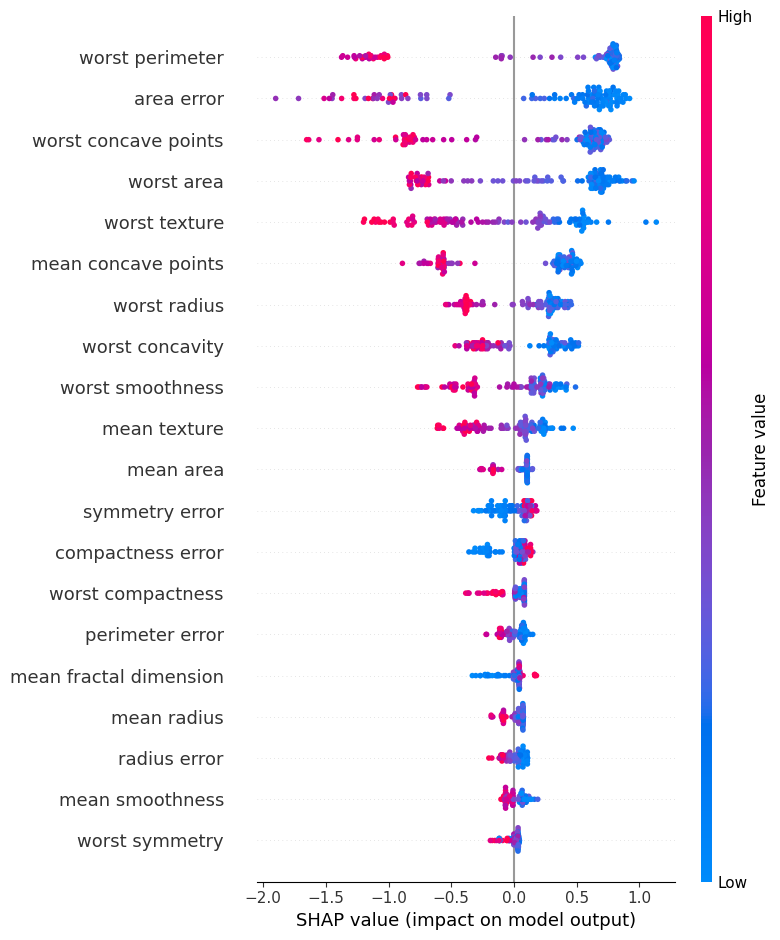

0件目のデータ 0 の予測値0


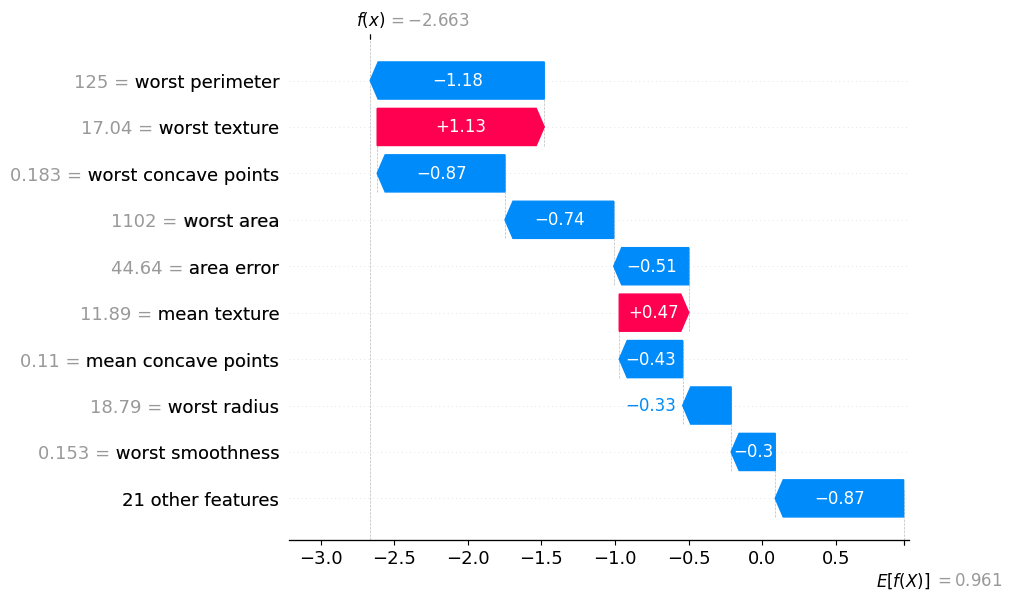

1件目のデータ 1 の予測値1


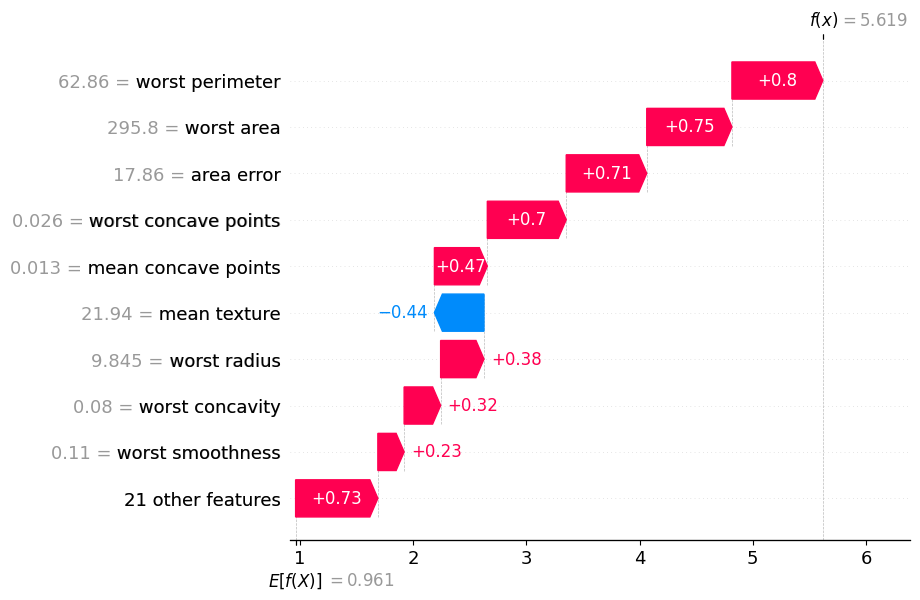

In [15]:
#このプログラムを実行する前に、10.6.2のプログラムを実行する必要あり
# 探索履歴のプロット
import matplotlib.pyplot as plt
optuna.visualization.plot_optimization_history(study).show()
# ハイパーパラメータの重要度プロット
optuna.visualization.plot_param_importances(study).show()

# SHAPによる予測の説明
import shap
explainer = shap.Explainer(model, X_train)
#shap値の計算
shap_values = explainer(X_test,check_additivity=False)
# SHAPサマリープロット
shap.summary_plot(shap_values, X_test)

plt.rcParams.update({"font.size": 18})

#評価データ0件目(先頭)のデータについて、判断の根拠を調べる
print(f"0件目のデータ {y_test[0]} の予測値{y_test_pred_class[0]}")
shap.plots.waterfall(shap_values[0])
#評価データ1件目(先頭)のデータについて、判断の根拠を調べる
print(f"1件目のデータ {y_test[1]} の予測値{y_test_pred_class[1]}")
shap.plots.waterfall(shap_values[1])
